### Summary of the Notebook

This notebook contains various image processing functions implemented using `Pillow`, `OpenCV`, and `Matplotlib`. Below is a concise summary of its contents:

1. **Imports**:
   - Libraries: `os`, `Pillow (Image, ImageOps)`, `IPython.display`, `Matplotlib`, `OpenCV`, and `NumPy`.

2. **Functions**:
   - **`convert_to_grayscale(image)`**: Converts a `Pillow` image to grayscale.
   - **`display_image(image, size=(300, 300))`**: Resizes and displays a `Pillow` image.
   - **`equalize_histogram(image)`**: Equalizes the histogram of a `Pillow` image using `ImageOps`.
   - **`read_image_cv2(image_path)`**: Reads an image using OpenCV and returns it as a NumPy array.
   - **`display_image_cv2(image)`**: Displays an OpenCV image in a Jupyter Notebook using `Matplotlib`.
   - **`display_images(*images, titles=None, figsize=(15, 10))`**: Displays multiple images in a grid layout.
   - **`equalize_light(image, limit=3, grid=(7,7), gray=False)`**: Enhances image contrast using CLAHE (OpenCV).
   - **`gauss_filter(image, kernel=(3,3), iterations=1)`**: Applies Gaussian blur to an image.
   - **`light(image, bright, contrast)`**: Adjusts brightness and contrast of an image.
   - **`binarize_image(image, threshold=128)`**: Binarizes a `Pillow` image based on a threshold.
   - **`show_histogram(image)`**: Displays the histogram of a `Pillow` image.
   - **`get_max_pixel_value_and_frequency(image)`**: Finds the pixel value with the maximum frequency in an image histogram.
   - **`get_min_pixel_value_and_frequency(image)`**: Finds the pixel value with the minimum frequency in an image histogram.

3. **Example Usage**:
   - Demonstrates reading an image using OpenCV, applying CLAHE, Gaussian blur, and brightness/contrast adjustments, and displaying the results using `display_images`.

This notebook provides a comprehensive set of tools for image preprocessing and visualization.

In [21]:
import os
from PIL import Image, ImageOps
from IPython.display import display
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [9]:
# A functino that receives an image and returns the image in grayscale
def convert_to_grayscale(image):
    """
    Convert the given image to grayscale.
    
    Parameters:
        image (PIL.Image): The input image to be converted.
        
    Returns:
        PIL.Image: The grayscale version of the input image.
    """
    return image.convert("L")

In [10]:
# A function to display an image in a given size
def display_image(image, size=(300, 300)):
    """
    Display the given image with a fixed size.
    
    Parameters:
        image (PIL.Image): The input image to be displayed.
        size (tuple): The desired size for the displayed image (width, height).
    """
    img_resized = image.resize(size)
    display(img_resized)

In [11]:
# A function to equalize the histogram of an image
def equalize_histogram(image):
    """
    Equalize the histogram of the given image.
    
    Parameters:
        image (PIL.Image): The input image to be equalized.
        
    Returns:
        PIL.Image: The histogram-equalized version of the input image.
    """
    return ImageOps.equalize(image)

In [ ]:
# A function to read images using cv2
def read_image_cv2(image_path):
	"""
	Read an image from the given path using cv2.
	
	Parameters:
		image_path (str): The path to the image file.
		
	Returns:
		numpy.ndarray: The image read by cv2 in BGR format.
	"""
	return cv2.imread(image_path)

In [30]:
# A function to display an image using cv2
def display_image_cv2(image):
	"""
	Display the given image using cv2 in Jupyter Notebook.
	
	Parameters:
		image (numpy.ndarray): The input image to be displayed.
	"""
	# Convert BGR to RGB for displaying correctly
	rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(rgb_image)
	plt.axis('off')  # Hide axes for better visualization
	plt.show()

In [48]:
# A function to dynamically show several images based on the input
# For example: display_images(my_img) will show just one image
#   display_images(my_img, second_img) will show the two images in a grid, and so on
def display_images(*images, titles=None, figsize=(15, 10)):
	"""
	Display multiple images in a grid layout.

	Parameters:
		images (list of PIL.Image or numpy.ndarray): The images to display.
		titles (list of str, optional): Titles for each image. Defaults to None.
		figsize (tuple, optional): Size of the figure. Defaults to (15, 10).
	"""
	num_images = len(images)
	cols = int(np.ceil(np.sqrt(num_images)))
	rows = int(np.ceil(num_images / cols))
	
	fig, axes = plt.subplots(rows, cols, figsize=figsize)
	axes = axes.flatten() if num_images > 1 else [axes]
	
	for i, ax in enumerate(axes):
		if i < num_images:
			img = images[i]
			if isinstance(img, np.ndarray):  # If the image is a numpy array
				img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
				ax.imshow(img)
			elif isinstance(img, Image.Image):  # If the image is a PIL image
				ax.imshow(img)
			else:
				raise ValueError("Unsupported image type")
			
			if titles and i < len(titles):
				ax.set_title(titles[i], fontsize=12)
		ax.axis('off')
	
	plt.tight_layout()
	plt.show()


In [20]:
def equalize_light(image, limit=3, grid=(7,7), gray=False):
    if (len(image.shape) == 2):
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        gray = True
    
    clahe = cv2.createCLAHE(clipLimit=limit, tileGridSize=grid)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))

    image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    if gray: 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return np.uint8(image)

In [27]:
def gauss_filter(image, kernel=(3,3), iterations=1):
    for _ in range(iterations):
        image = cv2.GaussianBlur(image, kernel, 0)
    return np.uint8(image)

In [34]:
def light(image, bright, contrast):
    bright = bright * 1.2
    contrast = contrast * 2
    image = image * ((contrast/127)+1) - contrast + bright
    image = np.clip(image, 0, 255)
    return np.uint8(image)

In [13]:
# A funtion to binarize an image
def binarize_image(image, threshold=128):
    """
    Binarize the given image using a specified threshold.
    
    Parameters:
        image (PIL.Image): The input image to be binarized.
        threshold (int): The threshold value for binarization (0-255).
        
    Returns:
        PIL.Image: The binarized version of the input image.
    """
    return image.point(lambda p: p > threshold and 255)

In [14]:
# A function to shoow the histogram of an image
def show_histogram(image):
    """
    Show the histogram of the given image.
    
    Parameters:
        image (PIL.Image): The input image for which to display the histogram.
    """
    histogram = image.histogram()
    plt.figure(figsize=(10, 5))
    plt.bar(range(256), histogram[:256], color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
# A function to get the maximum pixel frequency in the histogram and the corresponding pixel value
def get_max_pixel_value_and_frequency(image):
    """
    Get the pixel value with the maximum frequency from the histogram of the given image.
    
    Parameters:
        image (PIL.Image): The input image for which to calculate the maximum pixel value and frequency.
        
    Returns:
        tuple: A tuple containing the pixel value with the maximum frequency and its frequency.
    """
    histogram = image.histogram()
    max_pixel_value = histogram.index(max(histogram[:256]))
    max_frequency = max(histogram[:256])
    return max_pixel_value, max_frequency

In [ ]:
# A function to get the minimum pixel frequency in the histogram and the corresponding pixel value
def get_min_pixel_value_and_frequency(image):
	"""
	Get the pixel value with the minimum frequency from the histogram of the given image.
	
	Parameters:
		image (PIL.Image): The input image for which to calculate the minimum pixel value and frequency.
		
	Returns:
		tuple: A tuple containing the pixel value with the minimum frequency and its frequency.
	"""
	histogram = image.histogram()
	min_pixel_value = histogram.index(min(histogram[:256]))
	min_frequency = min(histogram[:256])
	return min_pixel_value, min_frequency

In [ ]:
images = os.listdir("img")
img_path = os.path.join("img", images[3])
print(img_path)

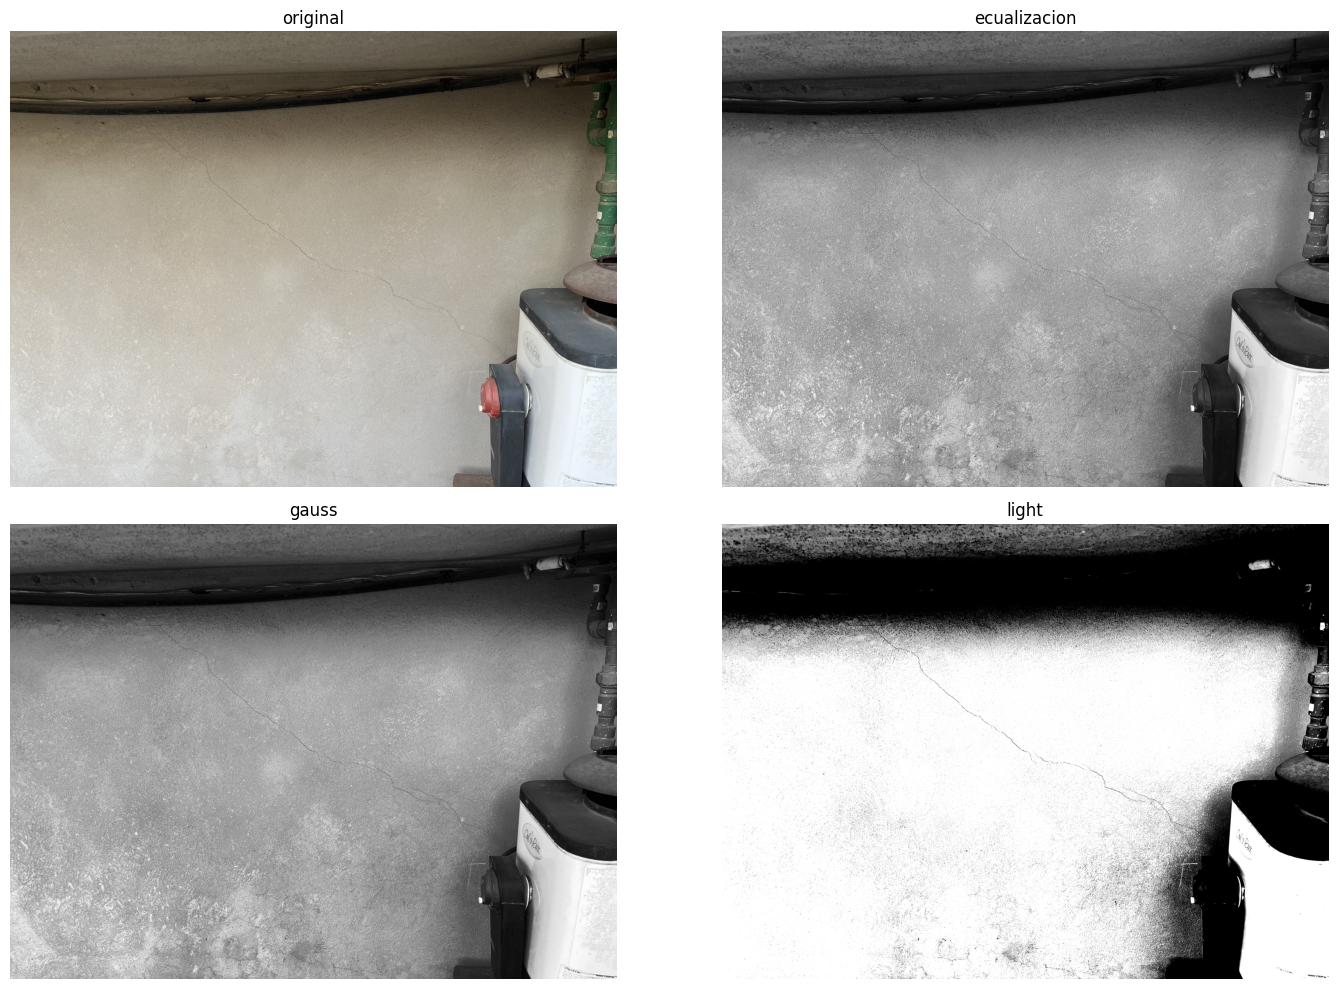

In [49]:
cv_img = cv2.imread(img_path)
img_bin = equalize_light(cv_img, limit=3, grid=(2,2), gray=True)
img_gauss = gauss_filter(img_bin)
img_light = light(img_gauss, 50, 150)
display_images(cv_img, img_bin, img_gauss, img_light, titles=('original', 'ecualizacion', 'gauss', 'light'))